# Part II - Ford GoBike System Data Analysis
## by Lamia Alshoaibi

## Investigation Overview

One of the main goals of data visualization in the data analysis process is to give support in making decision through appropriately designed graphically represented information. In this project, I used Python libraries such as NumPy, pandas, Matplotlib, and Seaborn to do the exploratory and explanatory analysis of Ford GoBike data to communicate my results.

The presentation will focus on how user type and gender impact the trip duration of Ford Gobikes. 

- Customers took longer time to complete the trip than subscribers. 

- When analyzing the day of weeks, subscribers tends to use the service in weekdays.

- Regardless of the user type, males appear to complete the trip faster than females.


## Dataset Overview

The Ford GoBike dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area during the month of February. In particular, the data contained the following features: Duration In Secounds, Start Station ID, Start Station Name, Start Station Latitude, Start Station Longitude, End Station ID, End Station Name, End Station Latitude, End Station Longitude, Bike ID, User Type (Subscriber or Customer), Member Year of Birth and Member Gender.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_clean=pd.read_csv('df_clean.csv')
df_clean.drop('Unnamed: 0',axis=1,inplace=True)

In [3]:
df_clean.head()

,start_time,end_time,start_station_name,end_station_name,user_type,member_gender,bike_share_for_all_trip,duration_minutes,start_day,hour
0,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,Male,Yes,26.416667,Thursday,23
1,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,Subscriber,Male,No,29.883333,Thursday,23
2,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,Palm St at Willow St,San Jose Diridon Station,Subscriber,Female,No,19.116667,Thursday,23
3,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,Washington St at Kearny St,Valencia St at 21st St,Subscriber,Male,No,26.916667,Thursday,23
4,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,Post St at Kearny St,Mission Playground,Subscriber,Male,No,17.483333,Thursday,23


## Distribution of trip duration for each user type

How long does the average trip duration take for each user type? As shown on plot below, the customers average trip duration is almost 15 minutes and subscribers average trip duration is almost 10 minutes.

*note: The trips duration of the dataset covering range from almost one minute to 60 minutes.

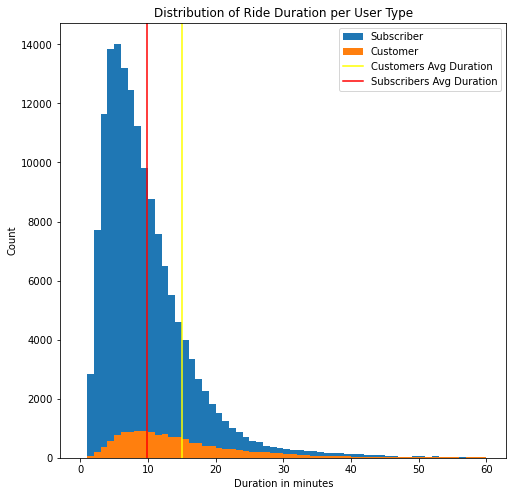

In [4]:
#plotting distribution of ride durations per user type
plt.figure(figsize=(8,8))

customer_mean = df_clean.query('user_type == "Customer"')['duration_minutes'].mean()
Subscriber_mean=cust_mean = df_clean.query('user_type == "Subscriber"')['duration_minutes'].mean()

#Subscriber
subs_bins= np.arange(0,61,1)
subs_d=df_clean.query('user_type == "Subscriber"')['duration_minutes']
plt.hist(x= subs_d, bins = subs_bins, label = 'Subscriber')
#Customer
cust_bins=np.arange(0,61,1)
cust_d=df_clean.query('user_type == "Customer"')['duration_minutes']
plt.hist(x= cust_d, bins = cust_bins, label = 'Customer')

plt.title('Distribution of Ride Duration per User Type')
plt.xlabel('Duration in minutes')
plt.ylabel('Count')

plt.axvline(customer_mean, color='yellow', label='Customers Avg Duration')
plt.axvline(Subscriber_mean, color='red', label='Subscribers Avg Duration')
plt.legend(loc='upper right')
plt.show();


## Consumption of daily trips per user type

Who is more consumption of daily trips?Customers or subscripers? In general, bike trip patterns were different on weekdays than on weekends. There is higher frequency of bike trips on weekdays than on weekends, and most of the trips started on Tuesday and Thursday. And as shown on the plot, subscripers has the most trips on daily usage than customers and used the service on weekdays more than weekends. Which makes us assume that subscribers used GoBike service for work while customers used it for entertainment. 

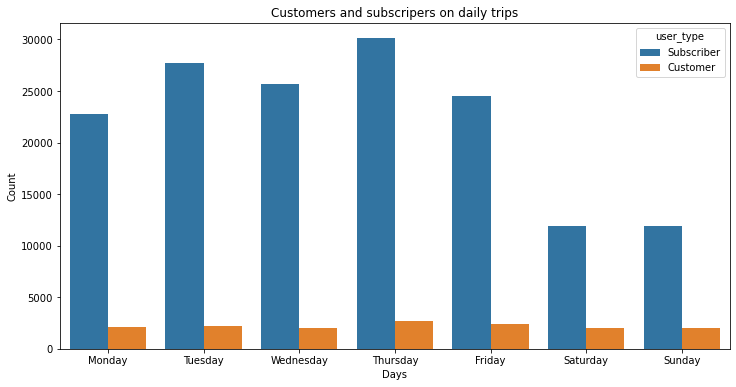

In [5]:
plt.figure(figsize=(12,6))
days_order =["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
sb.countplot(data=df_clean, x='start_day', hue='user_type',order=days_order)
plt.title('Customers and subscripers on daily trips')
plt.xlabel('Days')
plt.ylabel('Count');

## Comparison of trip durations between customers and subscribers for each gender

Do customers take longer bike trips than subscribers? The box plot showed that customers take longer trip durations than subscribers. and regardless of the user type, male appear to complete the trip faster than females.


In [6]:
def box_plot(data,x,y,hue,order=None):
    plt.figure(figsize=(14,6))
    sb.boxplot(data=data,x=x, y=y,hue=hue,order=order)
    plt.legend(loc='upper right');

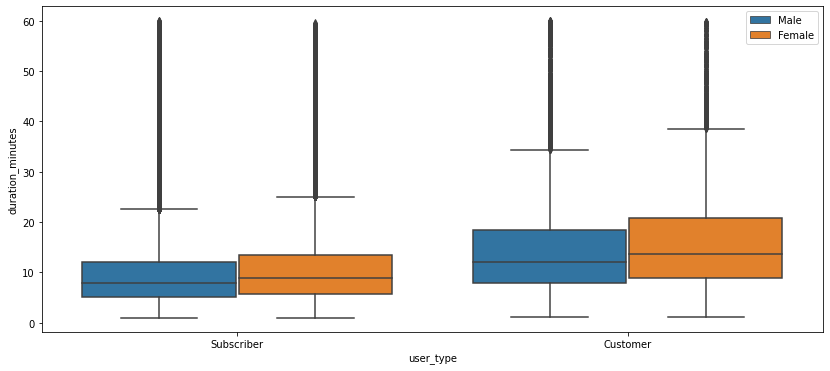

In [7]:
##### Comparison of trip durations between customers and subscribers for each gender    
box_plot(df_clean,df_clean.user_type,df_clean.duration_minutes,df_clean.member_gender)

## Distribution of trip durations per user type on each day of week

Do customers take longer bike trips on average than subscribers throughout the day?
The box plot below affirms that customers take longer bike trips on average regardless of the day of week. 



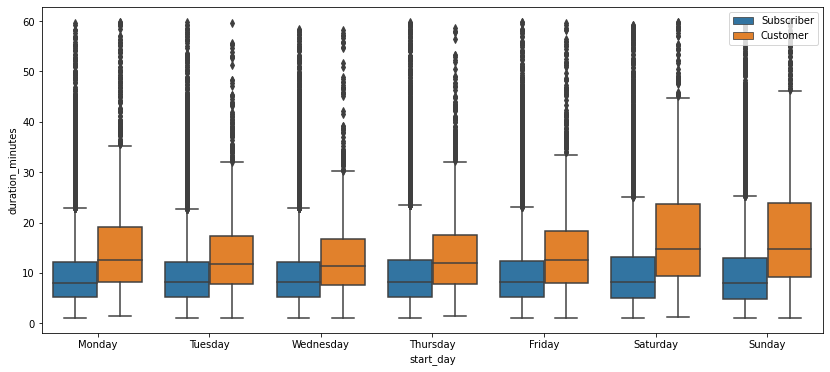

In [8]:
#distribution of trip durations per user type on each day of week
box_plot(df_clean,df_clean.start_day,df_clean.duration_minutes,df_clean.user_type,days_order)

In [9]:
!jupyter nbconvert Part_II_Explanatory_Data_Analysis.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_Explanatory_Data_Analysis.ipynb to slides
[NbConvertApp] Writing 668572 bytes to Part_II_Explanatory_Data_Analysis.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\DELL\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\DELL\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\DELL\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(no